<a href="https://colab.research.google.com/github/Cepera90/test/blob/main/test_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Import libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels as sm
import statsmodels.robust
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 
sns.set()

In [2]:
# Open inc_points_2
TP = pd.read_csv("/content/drive/MyDrive/test/inc_points_2.csv")

In [3]:
# % missing data
def mis_data(df):
  for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

In [ ]:
# columns with low % information
def low_info(df):
  num_rows = len(df.index)
  low_information_cols = []
  
  for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
      low_information_cols.append(col)
      print('{0}: {1:.5f}%'.format(col, top_pct*100))
      print(cnts)
      print()
  
  return(low_information_cols)

In [ ]:
mis_data(TP)

IncomingTrackId - 0%
Speed - 0%
Latitude - 0%
Longitude - 0%
PointDate - 0%
Height - 0%
Acceleration - 0%
Deceleration - 0%
TickTimestamp - 0%
AccelerationXOriginal - 0%
AccelerationYOriginal - 0%
AccelerationZOriginal - 0%


In [ ]:
low_info(TP)

No missing data and low info columns in inc_points dataframe

In [6]:
# Open OS token
OS = pd.read_csv("/content/drive/MyDrive/test/os.csv")

In [ ]:
mis_data(OS)

DeviceToken - 0%
os_version - 0%


In [ ]:
low_info(OS)

No missing data and low info columns in os dataframe

In [5]:
# Open rich_tracks_2
RT = pd.read_csv("/content/drive/MyDrive/test/rich_tracks_2.csv")

In [ ]:
mis_data(RT)

Id - 0%
TrackToken - 0%
DeviceToken - 0%
IncomingTrackId - 0%
StartDate - 0%
EndDate - 0%
Distance - 0%
Duration - 0%
AccelerationCount - 0%
DecelerationCount - 0%
Rating - 0%
PhoneUsage - 0%
TrackOrigin - 0%
OriginChanged - 0%
AddressStart - 0%
AddressFinish - 0%
DistanceGPS - 0%
Urban - 0%
Region - 29%
Country - 0%
RatingOverSpeed - 0%
RatingAcceleration - 0%
RatingTimeOfDay - 0%
RatingPhoneUsage - 0%
OverSpeedMileage - 0%
MidOverSpeedMileage - 0%
HighOverSpeedMileage - 0%
OriginalTrackOrigin - 50%
CompanyId - 0%
RushHours - 0%
NightHours - 0%
DailyHours - 0%
RatingDeceleration - 0%
KOverSpeed - 25%
KAcceleration - 30%
KTimeOfDay - 25%
KDeceleration - 30%
MaxSpeed - 0%
AverageSpeed - 0%
PhoneUsageOverSpeed - 0%
PhoneUsageKm - 0%
PhoneUsageOverSpeedKm - 0%
KPhoneUsage - 25%
Prediction - 100%
EcoScoringFuel - 0%
EcoScoringTyres - 0%
EcoScoringBrakes - 0%
EcoScoringDepreciation - 0%
EcoScoring - 0%
Shared - 0%
CityStart - 0%
CityFinish - 0%
UpdateDT - 0%
CorneringCount - 0%
CorneringDur

In [7]:
# Delete columns with 100% missing data
RT = RT.drop(['Prediction', 'VehicleId', 'BeaconId'], axis=1)

In [ ]:
low_info(RT)

EcoScoringBrakes: 99.92500%
100.0    3997
0.0         3
Name: EcoScoringBrakes, dtype: int64

Shared: 100.00000%
0.0    4000
Name: Shared, dtype: int64



['EcoScoringBrakes', 'Shared']

In [8]:
# Delete columns with low information
RT = RT.drop(['EcoScoringBrakes', 'Shared'], axis=1)

In [9]:
# Create DF with ID and device token
ID_t = pd.DataFrame({'IncomingTrackId':RT['IncomingTrackId'],'TrackOrigin':RT['TrackOrigin'],'DeviceToken':RT['DeviceToken']})

In [10]:
# Merge ID_t with OS
ID_OS = pd.merge(ID_t, OS, on='DeviceToken')
ID_OS = ID_OS.drop('DeviceToken', axis=1)

In [11]:
# Merge ID_OS with TP
TP_OS = pd.merge(TP, ID_OS, on='IncomingTrackId')

In [ ]:
TP_OS.head()

,IncomingTrackId,Speed,Latitude,Longitude,PointDate,Height,Acceleration,Deceleration,TickTimestamp,AccelerationXOriginal,AccelerationYOriginal,AccelerationZOriginal,TrackOrigin,os_version
0,20702795,0.0,55.863077,52.227935,2019-10-17 15:35:23.0000000 +03:00,98084.0,0.0,0.0,1571315732,0.829803,0.322861,-0.154434,OriginalDriver,iOS
1,20702795,0.0,55.863077,52.227935,2019-10-17 15:35:23.0000000 +03:00,98084.0,0.0,0.0,1571315733,0.716080,0.612228,-0.168091,OriginalDriver,iOS
2,20702795,0.0,55.895252,52.298750,2019-10-17 15:35:34.0000000 +03:00,80563.0,0.0,0.0,1571315734,0.913208,0.488998,0.308365,OriginalDriver,iOS
3,20702795,0.0,55.895252,52.298750,2019-10-17 15:35:34.0000000 +03:00,80563.0,0.0,0.0,1571315735,0.930328,0.396133,-0.145203,OriginalDriver,iOS
4,20702795,0.0,55.895252,52.298750,2019-10-17 15:35:34.0000000 +03:00,80563.0,0.0,0.0,1571315736,0.887436,0.647537,0.245926,OriginalDriver,iOS


Calculate the average, median and weighted average for the column acceleration

In [ ]:
TP_OS[TP_OS['os_version'] == 'iOS']['Acceleration'].mean()

0.00018738409719483965

In [ ]:
TP_OS[TP_OS['os_version'] == 'Android']['Acceleration'].mean()

0.2652440467867896

In [ ]:
stats.trim_mean(TP_OS[TP_OS['os_version'] == 'iOS']['Acceleration'], 0.1)

0.0

In [ ]:
stats.trim_mean(TP_OS[TP_OS['os_version'] == 'Android']['Acceleration'], 0.1)

0.0788343101881979

In [ ]:
TP_OS[TP_OS['os_version'] == 'iOS']['Acceleration'].median()

0.0

In [ ]:
TP_OS[TP_OS['os_version'] == 'Android']['Acceleration'].median()

0.0008686436715221

In [ ]:
TP_OS[TP_OS['os_version'] == 'iOS']['Acceleration'].std()

0.009657138607013805

In [ ]:
TP_OS[TP_OS['os_version'] == 'Android']['Acceleration'].std()

1.5203347546687902

In [ ]:
TP_OS[TP_OS['os_version'] == 'iOS']['Acceleration'].quantile(0.75) - TP_OS[TP_OS['os_version'] == 'iOS']['Acceleration'].quantile(0.25)

0.0

In [ ]:
TP_OS[TP_OS['os_version'] == 'Android']['Acceleration'].quantile(0.75) - TP_OS[TP_OS['os_version'] == 'Android']['Acceleration'].quantile(0.25)

0.16389051755196143

In [ ]:
sm.robust.scale.mad(TP_OS[TP_OS['os_version'] == 'iOS']['Acceleration'])

0.0

In [ ]:
sm.robust.scale.mad(TP_OS[TP_OS['os_version'] == 'Android']['Acceleration'])

0.10776255993232312

Median, mean truncated, difference between 25th and 75th percentiles and MAD for acceleration value for Android devices is zero, the average value and average squared deviation is sensitive to extreme values

Plot boxplot for acceleration and deceleration column:

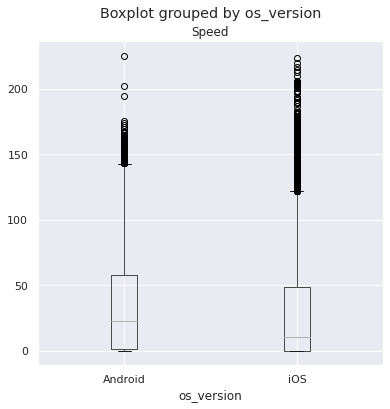

In [38]:
TP_OS.boxplot(by='os_version', column='Speed', figsize=(6,6))

Plot boxplot for acceleration and deceleration column:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9648712c50>,
      dtype=object)

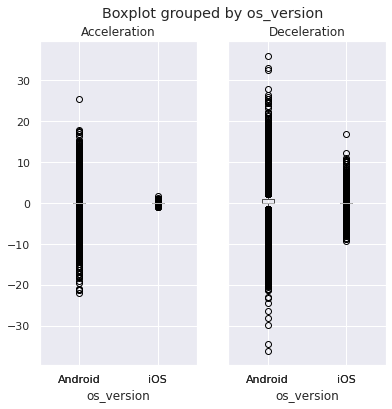

In [37]:
TP_OS.boxplot(by='os_version', column=['Acceleration','Deceleration'], figsize=(6,6))

Plot boxplot for AccelerationXOriginal, AccelerationYOriginal, AccelerationZOriginal column:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f964f087f10>,
      dtype=object)

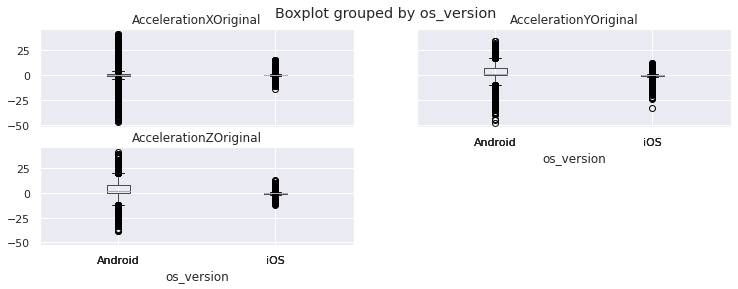

In [34]:
TP_OS.boxplot(by='os_version', column=['AccelerationXOriginal','AccelerationYOriginal','AccelerationZOriginal'], figsize=(12,4))

Frequency tables for acceleration column:

In [ ]:
binnedAccelerationIOS = pd.cut(TP_OS[TP_OS['os_version'] == 'iOS']['Acceleration'], 6)
binnedAccelerationIOS.value_counts()

(-0.0567, 0.389]     2979120
(0.389, 0.834]           677
(-0.502, -0.0567]        479
(-0.95, -0.502]           56
(0.834, 1.279]            14
(1.279, 1.725]             1
Name: Acceleration, dtype: int64

In [ ]:
binnedAccelerationA = pd.cut(TP_OS[TP_OS['os_version'] == 'Android']['Acceleration'], 7)
binnedAccelerationA.value_counts()

(-1.588, 5.181]       803448
(5.181, 11.951]        21552
(-8.358, -1.588]       16109
(-15.128, -8.358]       1160
(11.951, 18.721]          48
(-21.945, -15.128]        24
(18.721, 25.491]           1
Name: Acceleration, dtype: int64

Density plots for column acceleration:

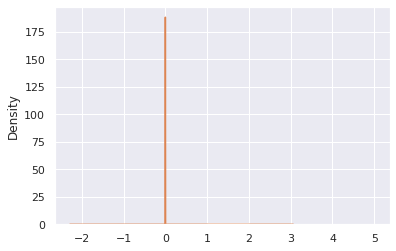

In [ ]:
ax = TP_OS[TP_OS['os_version'] == 'iOS']['Acceleration'].plot.hist(density=True, bins=range(1,6))
TP_OS[TP_OS['os_version'] == 'iOS']['Acceleration'].plot.density(ax=ax)

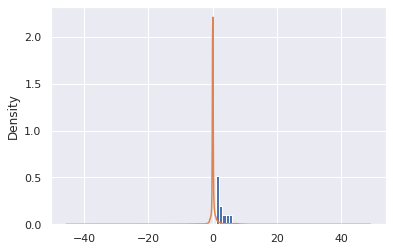

In [ ]:
ax = TP_OS[TP_OS['os_version'] == 'Android']['Acceleration'].plot.hist(density=True, bins=range(1,7))
TP_OS[TP_OS['os_version'] == 'Android']['Acceleration'].plot.density(ax=ax)

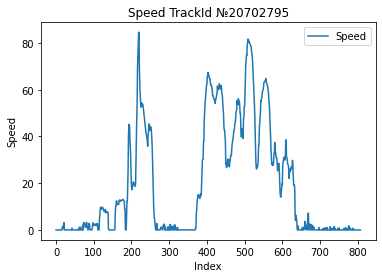

In [ ]:
# iOS track 20702795
TP_iOS_20702795 = TP_OS.query("IncomingTrackId == 20702795")
TP_iOS_20702795.loc[:,['Speed','PointDate']].plot(title='Speed TrackId №20702795',
                                                  xlabel='Index', ylabel='Speed')

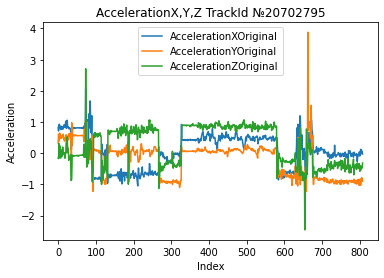

In [ ]:
TP_iOS_20702795.loc[:,['AccelerationXOriginal','AccelerationYOriginal','AccelerationZOriginal']].plot(title='AccelerationX,Y,Z TrackId №20702795',
                                                  xlabel='Index', ylabel='Acceleration')

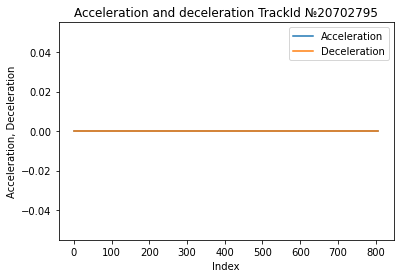

In [ ]:
TP_iOS_20702795.loc[:,['Acceleration','Deceleration']].plot(title='Acceleration and deceleration TrackId №20702795',
                                                  xlabel='Index', ylabel='Acceleration, Deceleration')

In [ ]:
RT.query("IncomingTrackId == 20702795")

,Id,TrackToken,DeviceToken,IncomingTrackId,StartDate,EndDate,Distance,Duration,AccelerationCount,DecelerationCount,Rating,PhoneUsage,TrackOrigin,OriginChanged,AddressStart,AddressFinish,DistanceGPS,Urban,Region,Country,RatingOverSpeed,RatingAcceleration,RatingTimeOfDay,RatingPhoneUsage,OverSpeedMileage,MidOverSpeedMileage,HighOverSpeedMileage,OriginalTrackOrigin,CompanyId,RushHours,NightHours,DailyHours,RatingDeceleration,KOverSpeed,KAcceleration,KTimeOfDay,KDeceleration,MaxSpeed,AverageSpeed,PhoneUsageOverSpeed,PhoneUsageKm,PhoneUsageOverSpeedKm,KPhoneUsage,Prediction,EcoScoringFuel,EcoScoringTyres,EcoScoringBrakes,EcoScoringDepreciation,EcoScoring,Shared,CityStart,CityFinish,UpdateDT,CorneringCount,CorneringDuration,AccelerationICount,DecelerationICount,AccelerationIDuration,DecelerationIDuration,RatingCornering,VehicleId,BeaconId,DeviationRatio,DeviationMeters
0,5148865,AB70A2A9-B45C-453D-B07C-C2D9E9D7442B,3E045058-A9A5-4442-A2CC-605B871C4B2C,20702795,2019-10-17 15:35:34.0000000 +03:00,2019-10-17 15:46:05.0000000 +03:00,4.203323,10.516667,2,1,1.45,1.316667,OriginalDriver,False,"Тойминская улица 11А, Менделеевск, Менделеевск...","Сосновая улица 4, Менделеевск, Менделеевский р...",4.096,True,Республика Татарстан,Россия,0.0,2.5,5.0,5.0,0.65,0.818,0.812,NaN,1061,0.0,0.0,10.516666,3.75,0.2,0.8,1.0,0.875,84.599998,38.704914,0.033333,0.789,0.045,1.0,NaN,100.0,100.0,100.0,100.0,100.000008,0.0,Менделеевский район,Менделеевский район,2019-10-17 15:01:40.393,1.0,1.0,111.0,6.0,120.0,7.0,NaN,NaN,NaN,0.0,7.390443


Track 20702795 - iOS, Acceleration, Deceleration have zero values although
AccelerationCount and DecelerationCount not zero.
TrackOrigin - OriginalDriver, OriginalTrackOrigin -NaN.

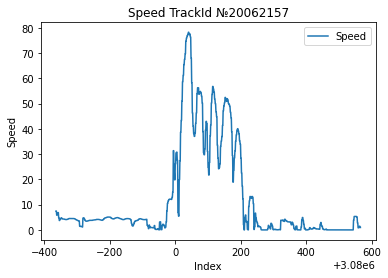

In [ ]:
# iOS track 20062157
TP_iOS_20062157 = TP_OS.query("IncomingTrackId == 20062157")
TP_iOS_20062157.loc[:,['Speed']].plot(title='Speed TrackId №20062157',
                                                  xlabel='Index', ylabel='Speed')

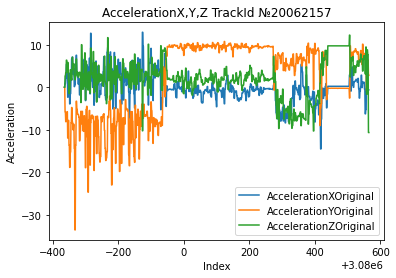

In [ ]:
TP_iOS_20062157.loc[:,['AccelerationXOriginal','AccelerationYOriginal','AccelerationZOriginal']].plot(title='AccelerationX,Y,Z TrackId №20062157',
                                                  xlabel='Index', ylabel='Acceleration')

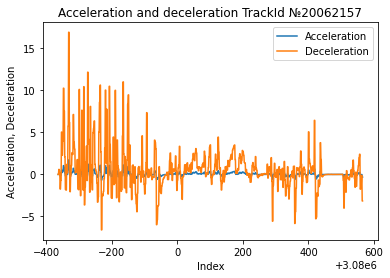

In [ ]:
TP_iOS_20062157.loc[:,['Acceleration','Deceleration']].plot(title='Acceleration and deceleration TrackId №20062157',
                                                  xlabel='Index', ylabel='Acceleration, Deceleration')

In [ ]:
TP_iOS_20062157.loc[:,['Acceleration','Deceleration','AccelerationXOriginal','AccelerationYOriginal','AccelerationZOriginal']].describe()

,Acceleration,Deceleration,AccelerationXOriginal,AccelerationYOriginal,AccelerationZOriginal
count,930.000000,930.000000,930.000000,930.000000,930.000000
mean,0.066475,0.652123,0.037104,1.813959,2.143998
std,0.270324,2.651875,3.398319,8.759745,4.383680
min,-0.673012,-6.602248,-14.518883,-33.555763,-10.659311
25%,-0.041209,-0.404261,-1.510787,-6.047938,0.512375
50%,0.022594,0.221651,-0.213090,6.256240,2.236253
75%,0.124601,1.222337,1.508393,9.440625,4.221107
max,1.724587,16.918199,12.936267,10.764660,12.261082


In [ ]:
RT.query("IncomingTrackId == 20062157")

,Id,TrackToken,DeviceToken,IncomingTrackId,StartDate,EndDate,Distance,Duration,AccelerationCount,DecelerationCount,Rating,PhoneUsage,TrackOrigin,OriginChanged,AddressStart,AddressFinish,DistanceGPS,Urban,Region,Country,RatingOverSpeed,RatingAcceleration,RatingTimeOfDay,RatingPhoneUsage,OverSpeedMileage,MidOverSpeedMileage,HighOverSpeedMileage,OriginalTrackOrigin,CompanyId,RushHours,NightHours,DailyHours,RatingDeceleration,KOverSpeed,KAcceleration,KTimeOfDay,KDeceleration,MaxSpeed,AverageSpeed,PhoneUsageOverSpeed,PhoneUsageKm,PhoneUsageOverSpeedKm,KPhoneUsage,Prediction,EcoScoringFuel,EcoScoringTyres,EcoScoringBrakes,EcoScoringDepreciation,EcoScoring,Shared,CityStart,CityFinish,UpdateDT,CorneringCount,CorneringDuration,AccelerationICount,DecelerationICount,AccelerationIDuration,DecelerationIDuration,RatingCornering,VehicleId,BeaconId,DeviationRatio,DeviationMeters
2705,5098633,4E830A74-B7C7-4D20-8EF0-2FFC8B1BD66D,D525DD98-9308-4D5A-8398-15537783E9C4,20062157,2019-10-12 23:10:39.0000000 +11:00,2019-10-12 23:17:31.0000000 +11:00,2.207773,6.866667,0,0,4.0,0.0,Passanger,True,"McDonalds Rd 300, South Morang, Melbourne, Aus...","Bugatti Ct 16, Mill Park, Melbourne, Australia",2.197,True,NaN,Australia,4.0,5.0,5.0,5.0,0.543,0.26,0.0,OriginalDriver,3129,0.0,0.0,6.866667,5.0,NaN,NaN,NaN,NaN,77.305702,31.093092,0.0,0.0,0.0,NaN,NaN,100.0,100.0,100.0,50.0,85.000008,0.0,Melbourne,Melbourne,2019-10-12 20:49:37.623,0.0,0.0,22.0,5.0,76.0,19.0,5.0,NaN,NaN,0.0,27.379586


Track 20062157 - iOS, Acceleration, Deceleration have not zero values although
AccelerationCount and DecelerationCount zero.
TrackOrigin - Passanger, OriginalTrackOrigin - OriginalDriver.

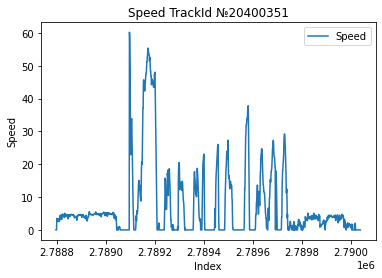

In [ ]:
# iOS track 20400351
TP_iOS_20400351 = TP_OS.query("IncomingTrackId == 20400351")
TP_iOS_20400351.loc[:,['Speed']].plot(title='Speed TrackId №20400351',
                                                  xlabel='Index', ylabel='Speed')

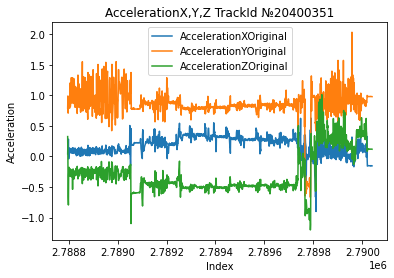

In [ ]:
TP_iOS_20400351.loc[:,['AccelerationXOriginal','AccelerationYOriginal','AccelerationZOriginal']].plot(title='AccelerationX,Y,Z TrackId №20400351',
                                                  xlabel='Index', ylabel='Acceleration')

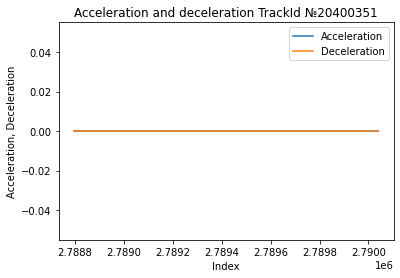

In [ ]:
TP_iOS_20400351.loc[:,['Acceleration','Deceleration']].plot(title='Acceleration and deceleration TrackId №20400351',
                                                  xlabel='Index', ylabel='Acceleration, Deceleration')

In [ ]:
RT.query("IncomingTrackId == 20400351")

,Id,TrackToken,DeviceToken,IncomingTrackId,StartDate,EndDate,Distance,Duration,AccelerationCount,DecelerationCount,Rating,PhoneUsage,TrackOrigin,OriginChanged,AddressStart,AddressFinish,DistanceGPS,Urban,Region,Country,RatingOverSpeed,RatingAcceleration,RatingTimeOfDay,RatingPhoneUsage,OverSpeedMileage,MidOverSpeedMileage,HighOverSpeedMileage,OriginalTrackOrigin,CompanyId,RushHours,NightHours,DailyHours,RatingDeceleration,KOverSpeed,KAcceleration,KTimeOfDay,KDeceleration,MaxSpeed,AverageSpeed,PhoneUsageOverSpeed,PhoneUsageKm,PhoneUsageOverSpeedKm,KPhoneUsage,Prediction,EcoScoringFuel,EcoScoringTyres,EcoScoringBrakes,EcoScoringDepreciation,EcoScoring,Shared,CityStart,CityFinish,UpdateDT,CorneringCount,CorneringDuration,AccelerationICount,DecelerationICount,AccelerationIDuration,DecelerationIDuration,RatingCornering,VehicleId,BeaconId,DeviationRatio,DeviationMeters
2060,5125859,BA51A096-0639-48BC-AE6C-F779D27EB0AB,CA17578E-48C4-49ED-903B-977EE9A013C7,20400351,2019-10-15 13:28:59.0000000 +03:00,2019-10-15 13:47:35.0000000 +03:00,3.144821,18.6,0,1,4.75,0.0,Taxi,True,"Левобережная улица 1А, Кировский район, Ростов...","улица Суворова 117, Кировский район, Ростов-на...",3.375,True,Ростовская область,Россия,5.0,5.0,5.0,5.0,0.0,0.0,0.0,OriginalDriver,1061,0.0,0.0,18.6,3.75,1.0,1.0,1.0,0.875,59.039997,18.565179,0.0,0.0,0.0,1.0,NaN,100.0,100.0,100.0,100.0,100.000008,0.0,Ростов-на-Дону,Ростов-на-Дону,2019-10-15 11:10:26.287,0.0,0.0,0.0,9.0,0.0,11.0,NaN,NaN,NaN,0.0,31.986093


Track 20400351 - iOS, Acceleration, Deceleration have zero values although DecelerationCount  not zero. TrackOrigin - Taxi, OriginalTrackOrigin - OriginalDriver.

In [ ]:
TP_OS.query("TrackOrigin != 'Passanger' & os_version == 'iOS' & Acceleration != 0")

,IncomingTrackId,Speed,Latitude,Longitude,PointDate,Height,Acceleration,Deceleration,TickTimestamp,AccelerationXOriginal,AccelerationYOriginal,AccelerationZOriginal,TrackOrigin,os_version


In [ ]:
TP_OS.query("TrackOrigin != 'Passanger' & os_version == 'iOS' & Deceleration != 0")

,IncomingTrackId,Speed,Latitude,Longitude,PointDate,Height,Acceleration,Deceleration,TickTimestamp,AccelerationXOriginal,AccelerationYOriginal,AccelerationZOriginal,TrackOrigin,os_version


iOS Acceleration and Deceleration not zero have only passanger

In [ ]:
TP_OS.query("OriginalTrackOrigin == 'Walking' &  Deceleration != 0")

,IncomingTrackId,Speed,Latitude,Longitude,PointDate,Height,Acceleration,Deceleration,TickTimestamp,AccelerationXOriginal,AccelerationYOriginal,AccelerationZOriginal,OriginalTrackOrigin,TrackOrigin,os_version


OriginalTrackOrigin == Walking have zero Deceleration and Acceleration

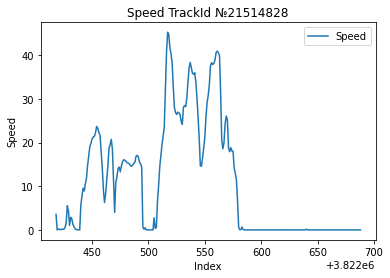

In [ ]:
# Android track 21514828
TP_A_21514828 = TP_OS.query("IncomingTrackId == 21514828")
TP_A_21514828.loc[:,['Speed']].plot(title='Speed TrackId №21514828',
                                                  xlabel='Index', ylabel='Speed')

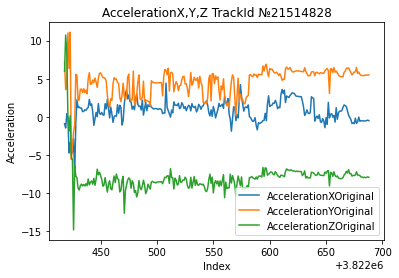

In [ ]:
TP_A_21514828.loc[:,['AccelerationXOriginal','AccelerationYOriginal','AccelerationZOriginal']].plot(title='AccelerationX,Y,Z TrackId №21514828',
                                                  xlabel='Index', ylabel='Acceleration')

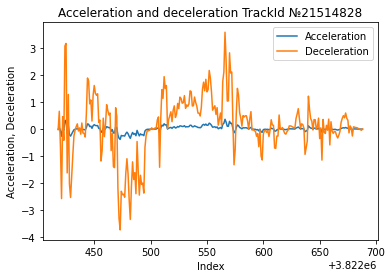

In [ ]:
TP_A_21514828.loc[:,['Acceleration','Deceleration']].plot(title='Acceleration and deceleration TrackId №21514828',
                                                  xlabel='Index', ylabel='Acceleration, Deceleration')

In [ ]:
TP_A_21514828.loc[:,['Acceleration','Deceleration','AccelerationXOriginal','AccelerationYOriginal','AccelerationZOriginal']].describe()

,Acceleration,Deceleration,AccelerationXOriginal,AccelerationYOriginal,AccelerationZOriginal
count,271.000000,271.000000,271.000000,271.000000,271.000000
mean,0.012499,0.122619,0.817916,4.566511,-7.975607
std,0.112108,1.099781,1.422133,1.841223,2.155643
min,-0.380511,-3.732811,-7.575254,-5.592855,-14.824897
25%,-0.016545,-0.162306,-0.038307,3.529053,-8.820239
50%,0.012269,0.120362,1.024718,5.152322,-8.025364
75%,0.069032,0.677205,1.608904,5.779603,-7.627927
max,0.365830,3.588794,4.424485,11.089942,10.726024


In [ ]:
RT.query("IncomingTrackId == 21514828")

,Id,TrackToken,DeviceToken,IncomingTrackId,StartDate,EndDate,Distance,Duration,AccelerationCount,DecelerationCount,Rating,PhoneUsage,TrackOrigin,OriginChanged,AddressStart,AddressFinish,DistanceGPS,Urban,Region,Country,RatingOverSpeed,RatingAcceleration,RatingTimeOfDay,RatingPhoneUsage,OverSpeedMileage,MidOverSpeedMileage,HighOverSpeedMileage,OriginalTrackOrigin,CompanyId,RushHours,NightHours,DailyHours,RatingDeceleration,KOverSpeed,KAcceleration,KTimeOfDay,KDeceleration,MaxSpeed,AverageSpeed,PhoneUsageOverSpeed,PhoneUsageKm,PhoneUsageOverSpeedKm,KPhoneUsage,Prediction,EcoScoringFuel,EcoScoringTyres,EcoScoringBrakes,EcoScoringDepreciation,EcoScoring,Shared,CityStart,CityFinish,UpdateDT,CorneringCount,CorneringDuration,AccelerationICount,DecelerationICount,AccelerationIDuration,DecelerationIDuration,RatingCornering,VehicleId,BeaconId,DeviationRatio,DeviationMeters
3999,5201839,A70AD579-AEF8-4173-A324-631A82019735,55D0C3A4-9E5B-4B57-BC22-E986158707F8,21514828,2019-10-23 12:32:24.0000000 +04:00,2019-10-23 12:32:04.0000000 +04:00,1.144486,-0.333333,0,0,3.9,0.0,Passanger,True,"улица Мира 68, Волжский, Волгоградская область...","улица Мира 53Ж, Волжский, Волгоградская област...",1.27,True,Волгоградская область,Россия,3.05,5.0,5.0,5.0,0.112,0.075,0.0,OriginalDriver,1061,0.0,0.0,1.133333,5.0,0.61,1.0,1.0,1.0,45.280136,23.094393,0.0,0.0,0.0,1.0,NaN,100.0,100.0,100.0,100.0,100.000008,0.0,Волжский,Волжский,2019-10-23 08:39:17.480,0.0,0.0,0.0,3.0,0.0,0.0,NaN,NaN,NaN,0.0,9.652287


Track 21514828 - Android, Acceleration, Deceleration have not zero values although
AccelerationCount and DecelerationCount zero.
TrackOrigin - Passanger.

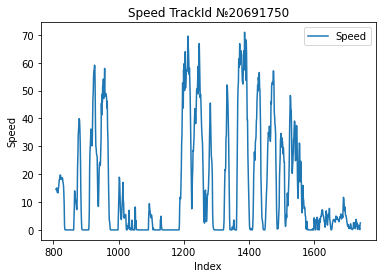

In [ ]:
# Android track 20691750
TP_A_20691750 = TP_OS.query("IncomingTrackId == 20691750")
TP_A_20691750.loc[:,['Speed']].plot(title='Speed TrackId №20691750',
                                                  xlabel='Index', ylabel='Speed')

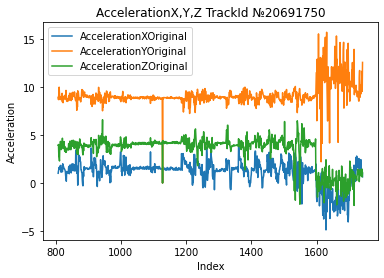

In [ ]:
TP_A_20691750.loc[:,['AccelerationXOriginal','AccelerationYOriginal','AccelerationZOriginal']].plot(title='AccelerationX,Y,Z TrackId №20691750',
                                                  xlabel='Index', ylabel='Acceleration')

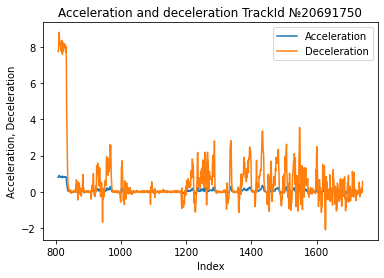

In [ ]:
TP_A_20691750.loc[:,['Acceleration','Deceleration']].plot(title='Acceleration and deceleration TrackId №20691750',
                                                  xlabel='Index', ylabel='Acceleration, Deceleration')

In [ ]:
TP_A_20691750.loc[:,['Acceleration','Deceleration','AccelerationXOriginal','AccelerationYOriginal','AccelerationZOriginal']].describe()

,Acceleration,Deceleration,AccelerationXOriginal,AccelerationYOriginal,AccelerationZOriginal
count,934.000000,934.000000,934.000000,934.000000,934.000000
mean,0.052919,0.519136,1.151694,9.178990,3.448931
std,0.150749,1.478849,1.232896,1.179172,1.532892
min,-0.215925,-2.118221,-4.881777,0.000000,-2.331953
25%,-0.003991,-0.039149,0.990601,8.777443,3.541623
50%,0.004596,0.045084,1.449689,8.942942,4.015076
75%,0.067716,0.664290,1.692701,9.252093,4.222175
max,0.900146,8.830428,3.786430,15.699978,6.591237


In [ ]:
RT.query("IncomingTrackId == 20691750")

,Id,TrackToken,DeviceToken,IncomingTrackId,StartDate,EndDate,Distance,Duration,AccelerationCount,DecelerationCount,Rating,PhoneUsage,TrackOrigin,OriginChanged,AddressStart,AddressFinish,DistanceGPS,Urban,Region,Country,RatingOverSpeed,RatingAcceleration,RatingTimeOfDay,RatingPhoneUsage,OverSpeedMileage,MidOverSpeedMileage,HighOverSpeedMileage,OriginalTrackOrigin,CompanyId,RushHours,NightHours,DailyHours,RatingDeceleration,KOverSpeed,KAcceleration,KTimeOfDay,KDeceleration,MaxSpeed,AverageSpeed,PhoneUsageOverSpeed,PhoneUsageKm,PhoneUsageOverSpeedKm,KPhoneUsage,Prediction,EcoScoringFuel,EcoScoringTyres,EcoScoringBrakes,EcoScoringDepreciation,EcoScoring,Shared,CityStart,CityFinish,UpdateDT,CorneringCount,CorneringDuration,AccelerationICount,DecelerationICount,AccelerationIDuration,DecelerationIDuration,RatingCornering,VehicleId,BeaconId,DeviationRatio,DeviationMeters
1,5148032,4BDD2EE6-FF53-4762-83DA-35A849935A99,669AFC5F-921C-40B9-B090-587BC95D34C2,20691750,2019-10-17 17:35:30.0000000 +05:00,2019-10-17 18:00:56.0000000 +05:00,414.0765,25.433333,0,1,4.75,0.0,OriginalDriver,False,"улица Труда 166/1, Центральный район, Челябинс...","улица Блюхера 69А, Советский район, Челябинск,...",6.233,True,Челябинская область,Россия,5.0,5.0,4.993904,5.0,0.608,0.0,0.0,NaN,1061,1.033333,0.0,24.4,3.75,1.0,1.0,1.0,0.875,70.91703,27.351787,0.0,0.0,0.0,1.0,NaN,100.0,100.0,100.0,75.0,92.5,0.0,Челябинск,Челябинск,2019-10-17 13:06:47.537,0.0,0.0,16.0,0.0,29.0,0.0,NaN,NaN,NaN,0.0,17.956039


Track 21514828 - Android, Acceleration, Deceleration have not zero values although AccelerationCount zero. TrackOrigin - OriginalDriver.

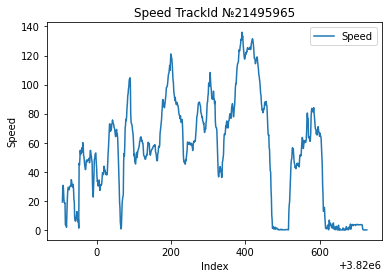

In [ ]:
# Android track 21495965
TP_A_21495965 = TP_OS.query("IncomingTrackId == 21495965")
TP_A_21495965.loc[:,['Speed']].plot(title='Speed TrackId №21495965',
                                                  xlabel='Index', ylabel='Speed')

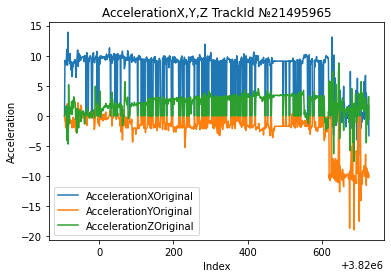

In [ ]:
TP_A_21495965.loc[:,['AccelerationXOriginal','AccelerationYOriginal','AccelerationZOriginal']].plot(title='AccelerationX,Y,Z TrackId №21495965',
                                                  xlabel='Index', ylabel='Acceleration')

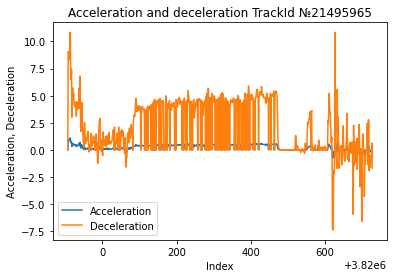

In [ ]:
TP_A_21495965.loc[:,['Acceleration','Deceleration']].plot(title='Acceleration and deceleration TrackId №21495965',
                                                  xlabel='Index', ylabel='Acceleration, Deceleration')

In [ ]:
TP_A_21495965.loc[:,['Acceleration','Deceleration','AccelerationXOriginal','AccelerationYOriginal','AccelerationZOriginal']].describe()

,Acceleration,Deceleration,AccelerationXOriginal,AccelerationYOriginal,AccelerationZOriginal
count,8.210000e+02,8.210000e+02,821.000000,821.000000,821.000000
mean,2.156177e-01,2.115209e+00,6.788540,-2.195534,1.818606
std,2.474142e-01,2.427134e+00,4.204013,3.126291,1.724844
min,-7.527654e-01,-7.384628e+00,-6.668808,-18.935974,-7.549515
25%,-8.728268e-12,-8.562431e-11,1.751602,-2.047287,0.240021
50%,1.478093e-01,1.450009e+00,9.095810,-1.554077,2.158981
75%,4.492910e-01,4.407544e+00,9.492065,-0.293533,3.138214
max,1.106214e+00,1.085196e+01,13.892593,6.227081,8.786133


In [ ]:
RT.query("IncomingTrackId == 21495965")

,Id,TrackToken,DeviceToken,IncomingTrackId,StartDate,EndDate,Distance,Duration,AccelerationCount,DecelerationCount,Rating,PhoneUsage,TrackOrigin,OriginChanged,AddressStart,AddressFinish,DistanceGPS,Urban,Region,Country,RatingOverSpeed,RatingAcceleration,RatingTimeOfDay,RatingPhoneUsage,OverSpeedMileage,MidOverSpeedMileage,HighOverSpeedMileage,OriginalTrackOrigin,CompanyId,RushHours,NightHours,DailyHours,RatingDeceleration,KOverSpeed,KAcceleration,KTimeOfDay,KDeceleration,MaxSpeed,AverageSpeed,PhoneUsageOverSpeed,PhoneUsageKm,PhoneUsageOverSpeedKm,KPhoneUsage,Prediction,EcoScoringFuel,EcoScoringTyres,EcoScoringBrakes,EcoScoringDepreciation,EcoScoring,Shared,CityStart,CityFinish,UpdateDT,CorneringCount,CorneringDuration,AccelerationICount,DecelerationICount,AccelerationIDuration,DecelerationIDuration,RatingCornering,VehicleId,BeaconId,DeviationRatio,DeviationMeters
3995,5200397,2C2F9DE6-3D4C-4A8F-BAE8-9E1EA86E8609,1928B514-9377-4F28-8773-235A52CFEB09,21495965,2019-10-23 08:48:43.0000000 +03:00,2019-10-23 09:07:07.0000000 +03:00,19.387928,18.4,1,0,1.9,0.566667,Taxi,True,"Закрытый переулок 10, Старокорсунская, Краснод...","Крылатая улица 12/2, Карасунский округ, Красно...",19.176,False,Краснодарский край,Россия,0.0,4.48,3.0,5.0,2.891,1.818,4.266,OriginalDriver,1061,18.4,0.0,0.0,5.0,0.2,0.95,1.0,1.0,136.020599,72.709185,0.566667,1.14,1.14,1.0,NaN,0.0,100.0,100.0,75.0,32.5,0.0,Краснодар,Краснодар,2019-10-23 06:18:13.443,0.0,0.0,328.0,0.0,634.0,0.0,NaN,NaN,NaN,0.0,4.658238


Track 5200397 - Android, Acceleration, Deceleration have not zero values although DecelerationCount zero. TrackOrigin - Taxi.

In [ ]:
def plot(x):
  for i in x:
    f, ax = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
    TP_OS[TP_OS['os_version'] == 'iOS'].iloc[:,i].hist(bins=100, ax=ax[0])
    TP_OS[TP_OS['os_version'] == 'iOS'].iloc[:,i].plot(kind='kde', secondary_y=True, ax=ax[0]);
    ax[0].set_title(str(TP_OS.columns[i]) + "   iOS")
    TP_OS[TP_OS['os_version'] == 'Android'].iloc[:,i].hist(bins=100, ax=ax[1])
    TP_OS[TP_OS['os_version'] == 'Android'].iloc[:,i].plot(kind='kde', secondary_y=True, ax=ax[1]);
    ax[1].set_title(str(TP_OS.columns[i]) + "   Android")

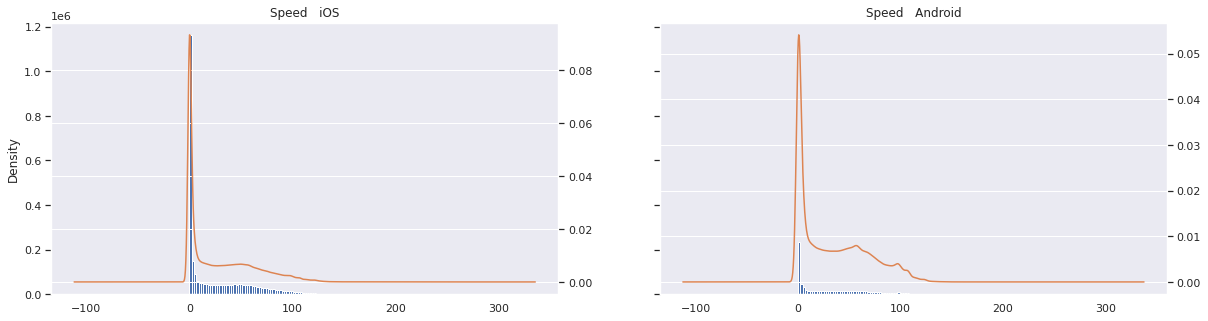

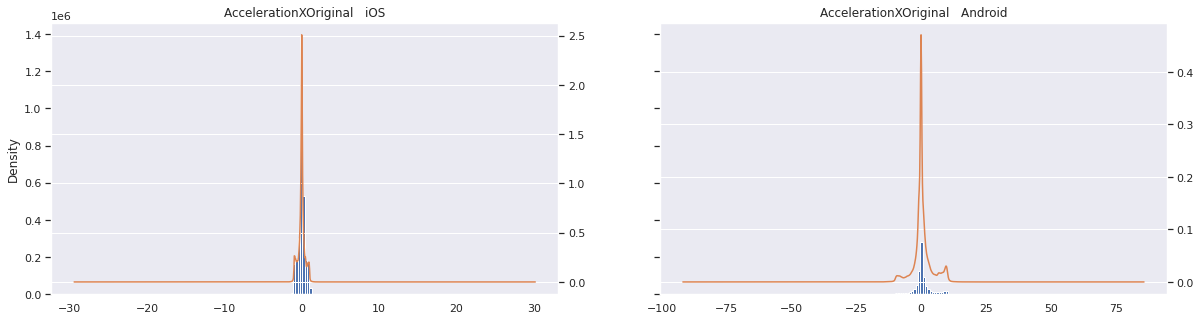

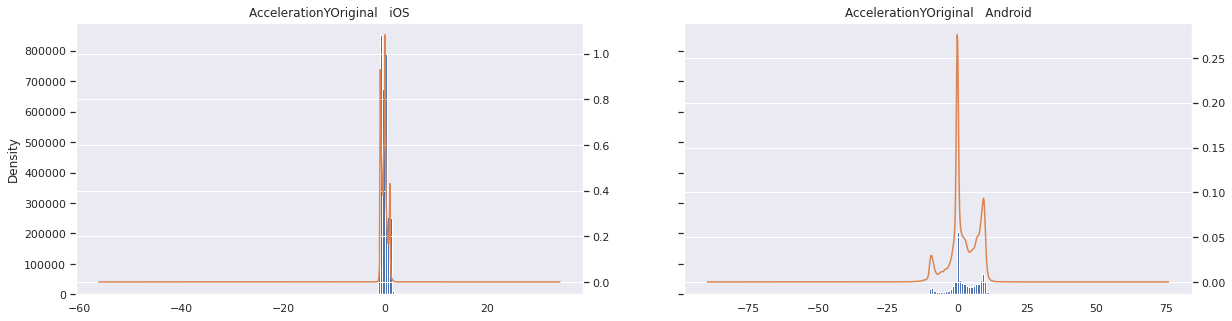

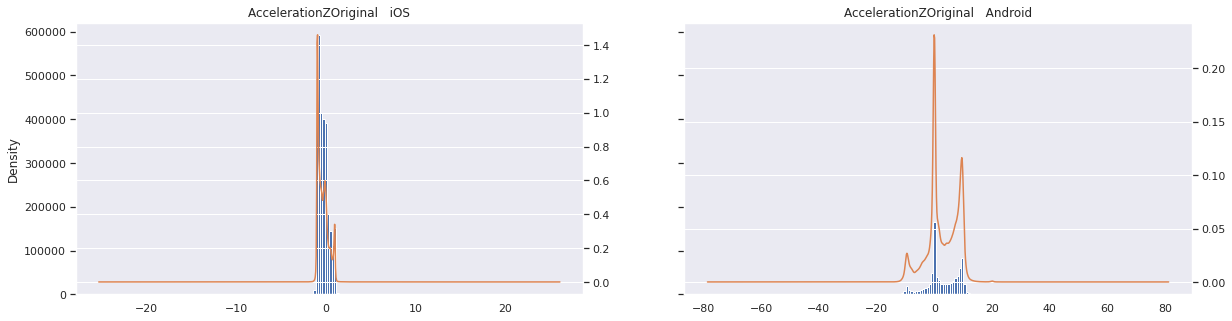

In [ ]:
plot([1,9,10,11])

We see that most of the iOS data is concentrated around zero, 
but the speed units are the same with Android data.

Most of the iOS and Android data is concentrated around zero, there are few non-zero data in the set.

We see that most of the iOS and Android data is concentrated around zero, the accelerationX,Y,Z units are the diffrent.

In [ ]:
#Columns with diffrent units
columns = ['AccelerationXOriginal','AccelerationYOriginal','AccelerationZOriginal']

In [ ]:
#Divide Android data Acceleration X,Y,Z to convert m/s**2 to gfrorce:
TP_OS.loc[TP_OS['os_version'] == 'Android', 'AccelerationXOriginal'] =\
TP_OS[TP_OS['os_version']=='Android']['AccelerationXOriginal'].apply(lambda x: x/9.81)

TP_OS.loc[TP_OS['os_version'] == 'Android', 'AccelerationYOriginal'] =\
TP_OS[TP_OS['os_version']=='Android']['AccelerationYOriginal'].apply(lambda x: x/9.81)

TP_OS.loc[TP_OS['os_version'] == 'Android', 'AccelerationZOriginal'] =\
TP_OS[TP_OS['os_version']=='Android']['AccelerationZOriginal'].apply(lambda x: x/9.81)

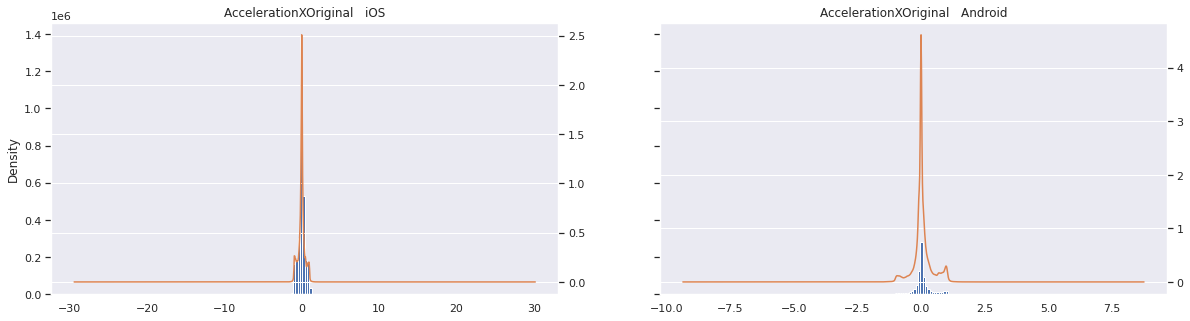

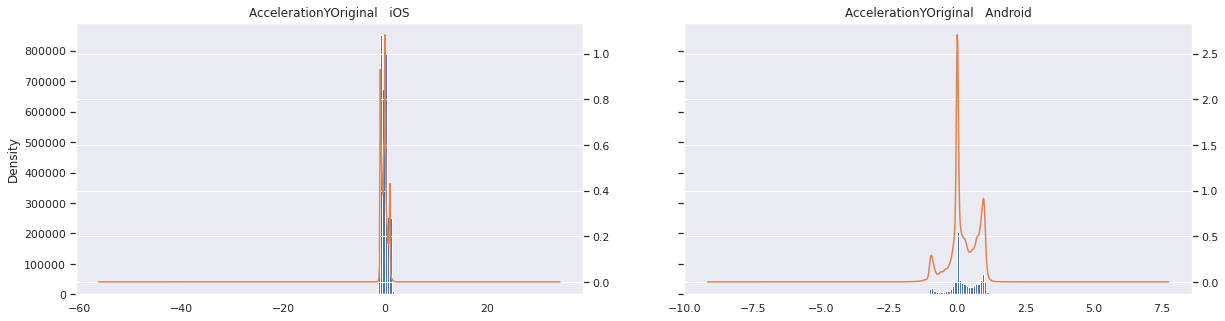

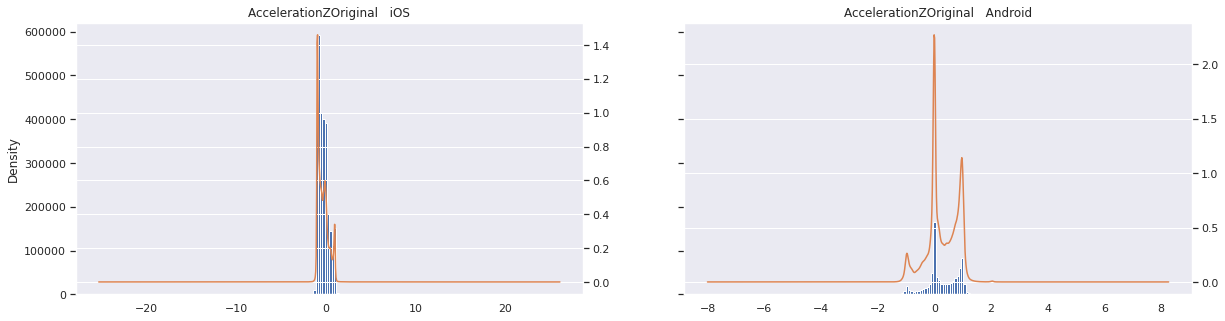

In [ ]:
plot([9,10,11])

In [ ]:
#Save inc_points to csv
TP_OS.to_csv('/content/drive/MyDrive/test/inc_points_c.csv')

In [ ]:
#Save rich_track to csv
RT.to_csv('/content/drive/MyDrive/test/rich_track_c.csv')